## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie 1
* Wczytaj dane.


In [2]:
import numpy as np
import pandas as pd 
with open('./dataset/dataset.npz', 'rb') as f:
     data = np.load(f)
     print(data.files)
     train, test = data['train'], data['test']

df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

train_new = df_train[df_train[0].isin([1.0, 2.0, 3.0 ,4.0 ,5.0, 6.0, 7.0, 8.0, 9.0 ,10.0])]
test_new = df_test[df_test[0].isin([1.0, 2.0, 3.0 ,4.0 ,5.0, 6.0, 7.0, 8.0, 9.0 ,10.0])]
X_train = train_new.iloc[:, 2:].values  
y_train = train_new.iloc[:, 0].values   

X_test = test_new.iloc[:, 2:].values  
y_test = test_new.iloc[:, 0].values


['train', 'test']


### Zadanie 2
Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa.

In [3]:

def fit_nearest_mean(X, y):
    labels = np.unique(y)
    class_means = {label: np.mean(X[y == label], axis=0) for label in labels}
    return class_means

def predict_nearest_mean(X, class_means):
    predictions = np.array([
        min(class_means, key=lambda label: np.linalg.norm(sample - class_means[label]))
        for sample in X
    ])
    return predictions

def score_nearest_mean(X, y, class_means):
    y_pred = predict_nearest_mean(X, class_means)
    return np.mean(y_pred == y)

class_means = fit_nearest_mean(X_train, y_train)
y_pred = predict_nearest_mean(X_test, class_means)
accuracy = score_nearest_mean(X_test, y_test, class_means)
print(f'Dokładność klasyfikatora NM: {accuracy:.4f}')

Dokładność klasyfikatora NM: 0.7253


### Zadanie 3
Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

\begin{equation*}
C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
\end{equation*}

gdzie:
* $X$ to macierz, 
* $\bar X$ to wektor ze średnimi wartościami cech. 



In [4]:
def covariance_matrix(X):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    C = (X_centered @ X_centered.T) / (X.shape[1] - 1)
    return C

class_means = fit_nearest_mean(X_train, y_train)
y_pred = predict_nearest_mean(X_test, class_means)
accuracy = score_nearest_mean(X_test, y_test, class_means)
print(f'Dokładność klasyfikatora NM: {accuracy:.4f}')

dataset_covariance = covariance_matrix(X_train)
numpy_covariance = np.cov(X_train)
print("Macierz kowariancji (własna implementacja):\n", dataset_covariance)
print("Macierz kowariancji (NumPy):\n", numpy_covariance)


Dokładność klasyfikatora NM: 0.7253
Macierz kowariancji (własna implementacja):
 [[0.48448438 0.40482708 0.36955315 ... 0.36975026 0.21664092 0.24533061]
 [0.40482708 0.36956758 0.36078542 ... 0.34844791 0.21257822 0.2454112 ]
 [0.36955315 0.36078542 0.41192151 ... 0.35297116 0.25198671 0.28185527]
 ...
 [0.36975026 0.34844791 0.35297116 ... 0.34129787 0.21155337 0.25105819]
 [0.21664092 0.21257822 0.25198671 ... 0.21155337 0.1706021  0.18634704]
 [0.24533061 0.2454112  0.28185527 ... 0.25105819 0.18634704 0.21803984]]
Macierz kowariancji (NumPy):
 [[0.48448438 0.40482708 0.36955315 ... 0.36975026 0.21664092 0.24533061]
 [0.40482708 0.36956758 0.36078542 ... 0.34844791 0.21257822 0.2454112 ]
 [0.36955315 0.36078542 0.41192151 ... 0.35297116 0.25198671 0.28185527]
 ...
 [0.36975026 0.34844791 0.35297116 ... 0.34129787 0.21155337 0.25105819]
 [0.21664092 0.21257822 0.25198671 ... 0.21155337 0.1706021  0.18634704]
 [0.24533061 0.2454112  0.28185527 ... 0.25105819 0.18634704 0.21803984]]


### Zadanie 4
Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa.

\begin{equation*}
D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
\end{equation*}

gdzie:
* $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
* $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
* $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
* a $x$ to klasyfikowana próbka.

> Podpowiedź: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> UWAGA: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [5]:
def fit_nearest_mean_mahalanobis(X, y):
    labels = np.unique(y)
    class_means = {label: np.mean(X[y == label], axis=0) for label in labels}
    class_cov_inv = {label: np.linalg.inv(np.cov(X[y == label].T)) for label in labels}
    return class_means, class_cov_inv

def mahalanobis_distance(x, mean, cov_inv):
    diff = x -mean
    return np.sqrt(diff.T @ cov_inv @ diff)

def predict_nearest_mean_mahalanobis(X, class_means, class_cov_inv):
    predictions = np.array([
        min(class_means, key=lambda label: mahalanobis_distance(sample, class_means[label], class_cov_inv[label]))
        for sample in X
    ])
    return predictions

def score_nearest_mean_mahalanobis(X, y, class_means, class_cov_inv):
    y_pred = predict_nearest_mean_mahalanobis(X,class_means, class_cov_inv)
    return np.mean(y_pred == y)
class_means, class_cov_inv = fit_nearest_mean_mahalanobis(X_train, y_train)
y_pred = predict_nearest_mean_mahalanobis(X_test, class_means, class_cov_inv)
accuracy = score_nearest_mean_mahalanobis(X_test, y_test, class_means, class_cov_inv)
print(f'Dokładność klasyfikatora NM z odległością Mahalanobisa: {accuracy:.4f}')

Dokładność klasyfikatora NM z odległością Mahalanobisa: 0.7718


### Zadanie 5
Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN. Wyświetl macierz pomyłek dla każdego z klasyfikatorów.

> Podpowiedź: Do wyświetlenia macierzy pomyłek możesz użyć funkcji [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oraz [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) z biblioteki `sklearn`.

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```




Dokładność klasyfikatora NM z odległością Mahalanobisa: 0.7718


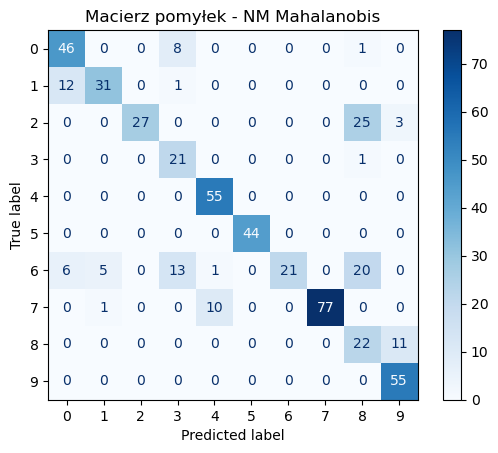

Dokładność klasyfikatora kNN: 0.7369


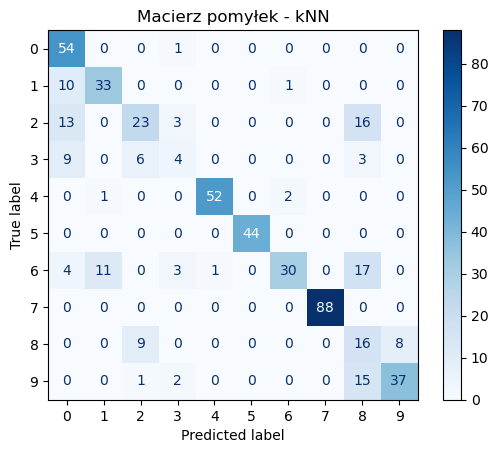

Porównanie dokładności:
NM Mahalanobis: 0.7718
kNN: 0.7369


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()
class_means, class_cov_inv = fit_nearest_mean_mahalanobis(X_train, y_train)
y_pred_nm = predict_nearest_mean_mahalanobis(X_test, class_means, class_cov_inv)
nm_accuracy = accuracy_score(y_test, y_pred_nm)
print(f'Dokładność klasyfikatora NM z odległością Mahalanobisa: {nm_accuracy:.4f}')
plot_confusion_matrix(y_test, y_pred_nm, "Macierz pomyłek - NM Mahalanobis")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred_knn)
print(f'Dokładność klasyfikatora kNN: {knn_accuracy:.4f}')
plot_confusion_matrix(y_test, y_pred_knn, "Macierz pomyłek - kNN")
print("Porównanie dokładności:")
print(f"NM Mahalanobis: {nm_accuracy:.4f}")
print(f"kNN: {knn_accuracy:.4f}")